In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time as time
%matplotlib inline


In [4]:
#data to study digit dataset for T-sne

In [6]:
!pip install pandas

In [2]:
from sklearn.manifold import TSNE
from sklearn import datasets
dig = datasets.load_digits(n_class=6)

In [3]:
dig

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  0., ...,  4.,  0.,  0.],
        [ 0.,  0.,  6., ...,  6.,  0.,  0.]]),
 'target': array([0, 1, 2, ..., 4, 4, 0]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [7]:
X = dig.data
y = dig.target
n_samples, n_features = X.shape
n_neighbors = 30

In [8]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=30)

Text(0.5, 1.0, 'A selection from the 64-dimensional digits dataset')

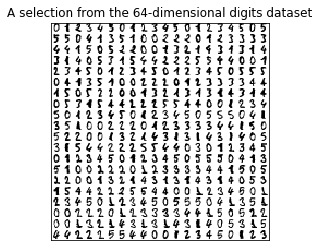

In [9]:
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')


Text(0.5, 1.0, 'A selection from the 64-dimensional digits dataset')

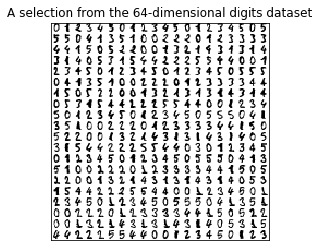

In [10]:
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(dig.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)


# ----------------------------------------------------------------------
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')


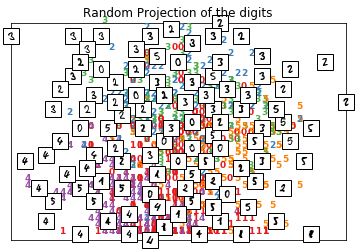

In [11]:
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors)
from matplotlib import offsetbox
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, "Random Projection of the digits")



Computing t-SNE embedding


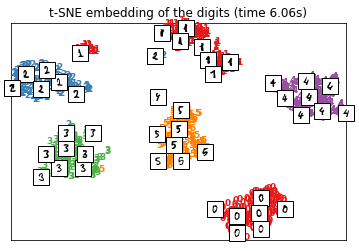

In [12]:
from time import time
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))


In [13]:
#Data 2 on iris to study T-sne

In [14]:
from sklearn import cluster, datasets
xtr, ytr = datasets.load_iris(return_X_y=True)

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

In [16]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [17]:
x_subset = xtr[0:2000]
y_subset = ytr[0:2000]

print(np.unique(y_subset))

[0 1 2]


In [18]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

fashion_tsne = TSNE(random_state=RS).fit_transform(x_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 0.7009303569793701 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(5.708046, 24.236458, '0'),
  Text(-0.7295535, -12.698181, '1'),
  Text(-4.030267, -4.8081303, '2')])

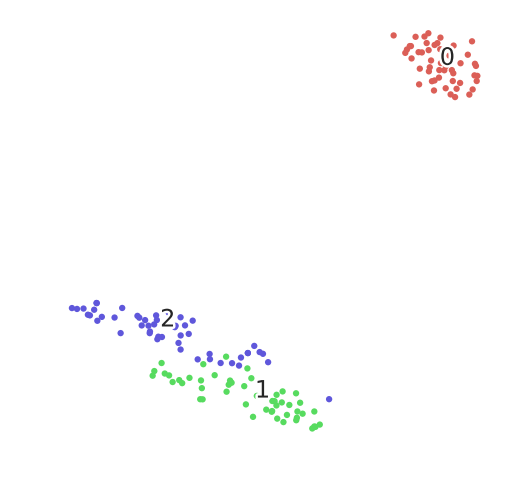

In [19]:
fashion_scatter(fashion_tsne, y_subset)

In [20]:
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(x_subset)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 0.0009961128234863281 seconds


In [21]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))


Variance explained per principal component: [0.92461872 0.05306648 0.01710261 0.00521218]


(<Figure size 576x576 with 1 Axes>,
 [Text(-2.634458132690074, 0.1761281943142946, '0'),
  Text(0.6148377637989699, -0.30362568375032817, '1'),
  Text(2.039571098150339, 0.09774340651524942, '2')])

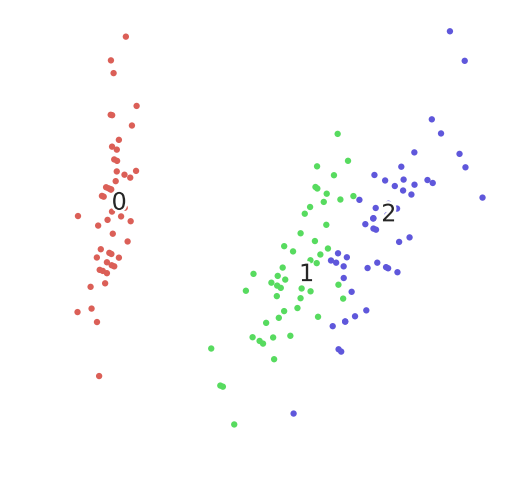

In [22]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

fashion_scatter(top_two_comp.values,y_subset) # Visualizing the PCA output

In [23]:
time_start = time.time()

pca_50 = PCA(n_components=4)
pca_result_50 = pca_50.fit_transform(x_subset)

print('PCA with 50 components done! Time elapsed: {} seconds'.format(time.time()-time_start))

print('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

PCA with 50 components done! Time elapsed: 0.0007293224334716797 seconds
Cumulative variance explained by 50 principal components: 1.0


In [24]:
import time
time_start = time.time()


fashion_pca_tsne = TSNE(random_state=RS).fit_transform(pca_result_50)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 0.712113618850708 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(2.4510803, 26.681248, '0'),
  Text(-0.12083306, -19.316755, '1'),
  Text(-1.6787822, -11.086393, '2')])

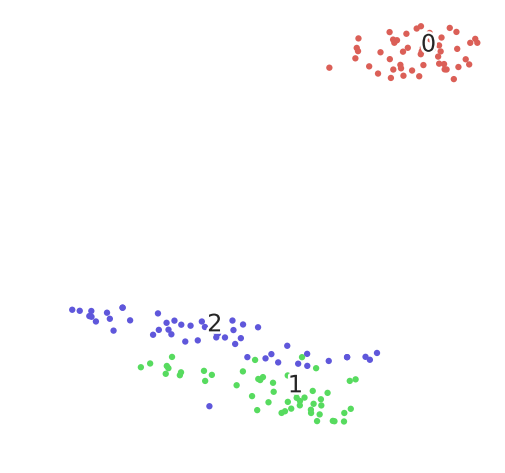

In [25]:
fashion_scatter(fashion_pca_tsne, y_subset)


In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
skillsPCA_labels = kmeans.fit_predict(pca_result)
dfskillsPCA = pd.DataFrame(pca_result)
dfskillsPCA['cluster'] = skillsPCA_labels
fashion_tsne

array([[ 5.69196129e+00,  2.36534920e+01],
       [ 4.56512833e+00,  2.59405556e+01],
       [ 5.52808189e+00,  2.64422855e+01],
       [ 5.25166941e+00,  2.66563492e+01],
       [ 5.32963514e+00,  2.35134563e+01],
       [ 5.91422033e+00,  2.16393795e+01],
       [ 6.18921185e+00,  2.63759480e+01],
       [ 5.74910021e+00,  2.44317837e+01],
       [ 4.86532021e+00,  2.73476944e+01],
       [ 4.97021103e+00,  2.56445274e+01],
       [ 6.41620398e+00,  2.22263317e+01],
       [ 6.04191732e+00,  2.52610531e+01],
       [ 4.66439915e+00,  2.63196259e+01],
       [ 5.31115150e+00,  2.77435875e+01],
       [ 6.73819590e+00,  2.09353161e+01],
       [ 6.24094820e+00,  2.06587372e+01],
       [ 6.29412985e+00,  2.15790558e+01],
       [ 5.86757326e+00,  2.36355038e+01],
       [ 6.85375977e+00,  2.15060959e+01],
       [ 5.52646923e+00,  2.25040073e+01],
       [ 7.01739550e+00,  2.30133228e+01],
       [ 5.68035126e+00,  2.28188095e+01],
       [ 6.83172083e+00,  2.68483810e+01],
       [ 6.

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
skillsPCA_labels = kmeans.fit_predict(pca_result)
dfskillsPCA = pd.DataFrame(pca_result)
dfskillsPCA['cluster'] = skillsPCA_labels

In [28]:
dftsne = pd.DataFrame(fashion_tsne)
dftsne['cluster'] = skillsPCA_labels
dftsne.columns = ['x1','x2','cluster']

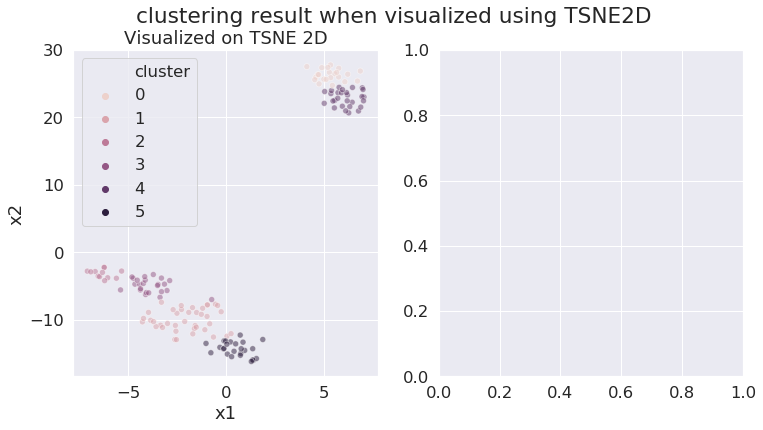

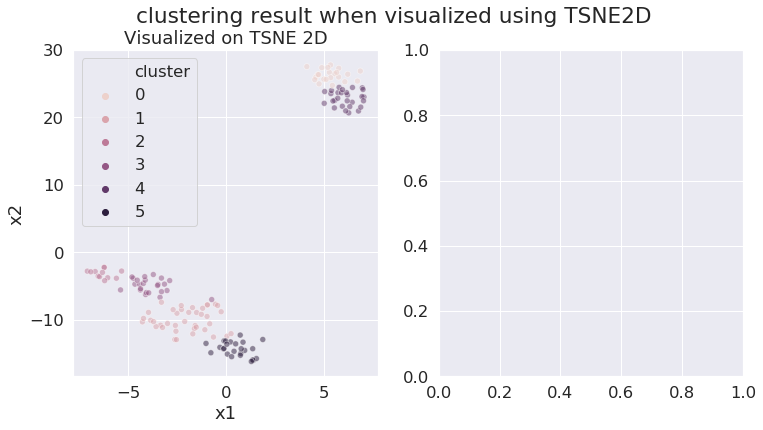

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[0])
ax[0].set_title('Visualized on TSNE 2D')
fig.suptitle('clustering result when visualized using TSNE2D ')
display(fig)

In [30]:
from sklearn import metrics
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2) # You want cluster of t-sne
kmeans.fit(x_subset)

KMeans(n_clusters=2)

In [31]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(n_clusters=2, n_jobs=1, precompute_distances='auto')

In [32]:
correct = 0
for i in range(len(x_subset)):
    predict_me = np.array(x_subset[i].astype(float))
    predict_me = predict_me.reshape(-1,len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(x_subset))

0.14


In [33]:
kmeans = kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
kmeans.fit(x_subset)

KMeans(max_iter=600, n_clusters=2)

In [34]:
correct = 0
for i in range(len(x_subset)):
    predict_me = np.array(x_subset[i].astype(float))
    predict_me = predict_me.reshape(-1,len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(x_subset))

0.14
